**Problem Statement :** 
Analyzing New York City motor vehicle collision data to understand the reasons and pattern of road accidents in various boroughs of the city

In [589]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import datetime as dt
import calendar


import warnings
warnings.filterwarnings('ignore')

## 1. Reading and Analyzing the Data

In [499]:
df = pd.read_csv('bquxjob_7bce96a6_18132c5672b.csv')

In [500]:
df.head()

,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,cross_street_name,timestamp,latitude,longitude,...,number_of_persons_killed,off_street_name,on_street_name,unique_key,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,zip_code
0,QUEENS,Outside Car Distraction,Unspecified,NaN,NaN,NaN,GREENWAY SOUTH,2018-01-17T10:35:00Z,40.710400,-73.839740,...,0,NaN,UNION TURNPIKE,3830694,SPORT UTILITY / STATION WAGON,AM,NaN,NaN,NaN,11375.0
1,MANHATTAN,Fatigued/Drowsy,Other Vehicular,NaN,NaN,NaN,3 AVENUE,2015-05-08T17:30:00Z,40.780125,-73.953034,...,0,NaN,EAST 88 STREET,3216563,PASSENGER VEHICLE,MOTORCYCLE,NaN,NaN,NaN,10128.0
2,QUEENS,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,NaN,2017-11-22T07:15:00Z,40.685524,-73.844600,...,0,99-08 97 STREET,NaN,3795174,PASSENGER VEHICLE,CONV,NaN,NaN,NaN,11416.0
3,BRONX,Turning Improperly,Unspecified,NaN,NaN,NaN,WESTCHESTER AVENUE,2017-12-05T07:30:00Z,40.832650,-73.863660,...,0,NaN,LELAND AVENUE,3803160,PASSENGER VEHICLE,BU,NaN,NaN,NaN,10472.0
4,BRONX,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,NaN,2017-11-03T09:22:00Z,40.853233,-73.891750,...,0,4487 3 AVENUE,NaN,3794016,PASSENGER VEHICLE,TK,NaN,NaN,NaN,10457.0


In [501]:
print("This dataset has {} columns and {} rows".format(df.shape[1], df.shape[0]))

This dataset has 28 columns and 18952 rows


In [502]:
#show all features and its type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18952 entries, 0 to 18951
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   borough                        15960 non-null  object 
 1   contributing_factor_vehicle_1  18770 non-null  object 
 2   contributing_factor_vehicle_2  12051 non-null  object 
 3   contributing_factor_vehicle_3  449 non-null    object 
 4   contributing_factor_vehicle_4  68 non-null     object 
 5   contributing_factor_vehicle_5  17 non-null     object 
 6   cross_street_name              12714 non-null  object 
 7   timestamp                      18952 non-null  object 
 8   latitude                       17097 non-null  float64
 9   longitude                      17097 non-null  float64
 10  location                       17097 non-null  object 
 11  number_of_cyclist_injured      18952 non-null  int64  
 12  number_of_cyclist_killed       18952 non-null 

In [503]:
#Convert datatype of accident timestamp to Datetime

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year']  = df.timestamp.dt.year

In [505]:
print('Data is from {} till {}'.format(df.timestamp.min().date(),df.timestamp.max().date()))

Data is from 2014-01-01 till 2018-01-21


**Hence, we should take data from 1 Jan 2014 till Dec 31 2018 for correct analysis**

In [509]:
df = df[df['year'] != 2018]
print('Data is from {} till {}'.format(df.timestamp.min().date(),df.timestamp.max().date()))
print("This dataset has {} columns and {} rows".format(df.shape[1], df.shape[0]))

Data is from 2014-01-01 till 2017-12-31
This dataset has 29 columns and 18002 rows


In [510]:
#check null value percentage per feature
pd.DataFrame(df.isnull().sum() / df.shape[0] *100, columns=['Missing Value %'])

,Missing Value %
borough,15.148317
contributing_factor_vehicle_1,0.888790
contributing_factor_vehicle_2,36.945895
contributing_factor_vehicle_3,97.644706
contributing_factor_vehicle_4,99.627819
contributing_factor_vehicle_5,99.905566
cross_street_name,32.157538
timestamp,0.000000
latitude,10.004444
longitude,10.004444


<AxesSubplot:title={'center':'Heatmap of Missing Values'}>

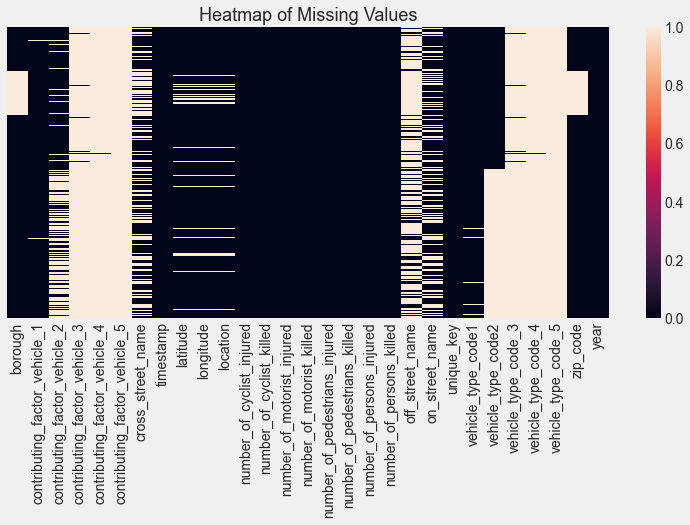

In [511]:
# Create Heatmap of Missing Values

plt.figure(figsize=(12,5))
plt.title('Heatmap of Missing Values', fontsize=18)
sns.heatmap(df.isnull(), yticklabels=False)

## 2. Clean the Data

In [512]:
# replace capslock to lowercase for all columns
df.columns = [i.lower() for i in df.columns]

In [513]:
df.head()

,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,cross_street_name,timestamp,latitude,longitude,...,off_street_name,on_street_name,unique_key,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,zip_code,year
1,MANHATTAN,Fatigued/Drowsy,Other Vehicular,NaN,NaN,NaN,3 AVENUE,2015-05-08 17:30:00+00:00,40.780125,-73.953034,...,NaN,EAST 88 STREET,3216563,PASSENGER VEHICLE,MOTORCYCLE,NaN,NaN,NaN,10128.0,2015
2,QUEENS,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,NaN,2017-11-22 07:15:00+00:00,40.685524,-73.844600,...,99-08 97 STREET,NaN,3795174,PASSENGER VEHICLE,CONV,NaN,NaN,NaN,11416.0,2017
3,BRONX,Turning Improperly,Unspecified,NaN,NaN,NaN,WESTCHESTER AVENUE,2017-12-05 07:30:00+00:00,40.832650,-73.863660,...,NaN,LELAND AVENUE,3803160,PASSENGER VEHICLE,BU,NaN,NaN,NaN,10472.0,2017
4,BRONX,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,NaN,2017-11-03 09:22:00+00:00,40.853233,-73.891750,...,4487 3 AVENUE,NaN,3794016,PASSENGER VEHICLE,TK,NaN,NaN,NaN,10457.0,2017
5,QUEENS,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,NaN,2017-12-04 19:00:00+00:00,40.765240,-73.913895,...,28-05 STEINWAY STREET,NaN,3802874,SPORT UTILITY / STATION WAGON,BU,NaN,NaN,NaN,11103.0,2017


In [514]:
#Extract date and time separately from timestamp feature

df['accident_date'] = pd.to_datetime(df['timestamp']).dt.date
df['accident_time'] = pd.to_datetime(df['timestamp']).dt.time

In [515]:
# Convert values of all text columns to Proper Case

df = df.applymap(lambda s:s.capitalize() if type(s) == str else s)

In [516]:
df.head()

,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,cross_street_name,timestamp,latitude,longitude,...,unique_key,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,zip_code,year,accident_date,accident_time
1,Manhattan,Fatigued/drowsy,Other vehicular,NaN,NaN,NaN,3 avenue,2015-05-08 17:30:00+00:00,40.780125,-73.953034,...,3216563,Passenger vehicle,Motorcycle,NaN,NaN,NaN,10128.0,2015,2015-05-08,17:30:00
2,Queens,Driver inattention/distraction,Unspecified,NaN,NaN,NaN,NaN,2017-11-22 07:15:00+00:00,40.685524,-73.844600,...,3795174,Passenger vehicle,Conv,NaN,NaN,NaN,11416.0,2017,2017-11-22,07:15:00
3,Bronx,Turning improperly,Unspecified,NaN,NaN,NaN,Westchester avenue,2017-12-05 07:30:00+00:00,40.832650,-73.863660,...,3803160,Passenger vehicle,Bu,NaN,NaN,NaN,10472.0,2017,2017-12-05,07:30:00
4,Bronx,Driver inattention/distraction,Unspecified,NaN,NaN,NaN,NaN,2017-11-03 09:22:00+00:00,40.853233,-73.891750,...,3794016,Passenger vehicle,Tk,NaN,NaN,NaN,10457.0,2017,2017-11-03,09:22:00
5,Queens,Driver inattention/distraction,Unspecified,NaN,NaN,NaN,NaN,2017-12-04 19:00:00+00:00,40.765240,-73.913895,...,3802874,Sport utility / station wagon,Bu,NaN,NaN,NaN,11103.0,2017,2017-12-04,19:00:00


In [517]:
# Create a Dataframe of All Reasons for Accidents Across All Vehicles 
# This is required because vehicles involved in the accidents are stored in separate columns. Hence need to aggregate all of the
# vehicles' data to have clear picture of vehicles which are most involved in accidents

df1 = df[['borough','contributing_factor_vehicle_1','vehicle_type_code1']]

df2 = df[['borough','contributing_factor_vehicle_2','vehicle_type_code2']]

df3 = df[['borough','contributing_factor_vehicle_3','vehicle_type_code_3']]

df4 = df[['borough','contributing_factor_vehicle_4','vehicle_type_code_4']]

df5 = df[['borough','contributing_factor_vehicle_5','vehicle_type_code_5']]

df1.columns = df2.columns = df3.columns = df4.columns = df5.columns = ['borough','contributing_factor_vehicle','vehicle_type_code']

final_df = pd.concat([df1,df2,df3,df4,df5])
final_df.head()

,borough,contributing_factor_vehicle,vehicle_type_code
1,Manhattan,Fatigued/drowsy,Passenger vehicle
2,Queens,Driver inattention/distraction,Passenger vehicle
3,Bronx,Turning improperly,Passenger vehicle
4,Bronx,Driver inattention/distraction,Passenger vehicle
5,Queens,Driver inattention/distraction,Sport utility / station wagon


In [518]:
final_df.shape

(90010, 3)

In [519]:
df.shape[0]*5

90010

## 3. EDA

[Text(0, 0, '3973'),
 Text(0, 0, '3946'),
 Text(0, 0, '3373'),
 Text(0, 0, '3150'),
 Text(0, 0, '2727'),
 Text(0, 0, '833')]

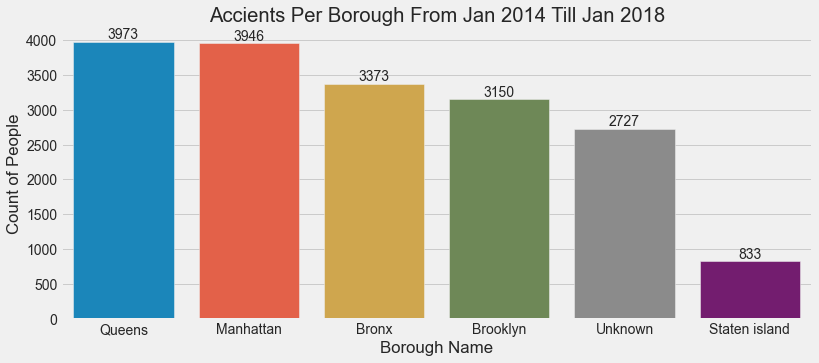

In [541]:
# Analysis of Data corresponding to each Borough

fig, ax = plt.subplots(1,1,figsize=(12,5))
plt.title('Accients Per Borough From Jan 2014 Till Jan 2018')
sns.barplot(x=df.fillna({'borough':'Unknown'}).groupby('borough').size().sort_values(ascending=False).index,
            y=df.fillna({'borough':'Unknown'}).groupby('borough').size().sort_values(ascending=False))

plt.xlabel("Borough Name")
plt.ylabel("Count of People")
ax.bar_label(ax.containers[0])

**INSIGHTS:**
1. ROAD ACCIDENTS ARE MORE FREQUENT IN MANHATTAN, QUEENS, BROOKLYN AND BRONX
2. STATEN ISLAND HAS THE LOWEST ACCIDENT RATE

[Text(0, 0, '2800'),
 Text(0, 0, '2914'),
 Text(0, 0, '3947'),
 Text(0, 0, '8341')]

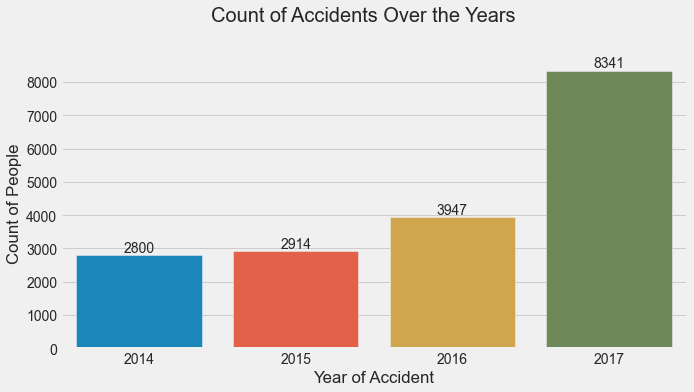

In [556]:
# Accidents Over the Years

df['year'] = df['timestamp'].dt.year
fig,ax = plt.subplots(1,1,figsize=(10,5))
plt.suptitle('Count of Accidents Over the Years', x=0.5, y=1.02, fontsize=20)

sns.barplot(x=df.groupby('year').size().index ,y=df.groupby('year').size())
plt.ylabel("Count of People")
plt.xlabel("Year of Accident")
ax.bar_label(ax.containers[0])

**INSIGHTS:**
1. Road accidents have increased exponentially since 2014 till 2017
2. Year 2017 has peak of number of accidents in NYC

[Text(0, 0, '3462'),
 Text(0, 0, '1093'),
 Text(0, 0, '829'),
 Text(0, 0, '794'),
 Text(0, 0, '728'),
 Text(0, 0, '598'),
 Text(0, 0, '439'),
 Text(0, 0, '413'),
 Text(0, 0, '360'),
 Text(0, 0, '313')]

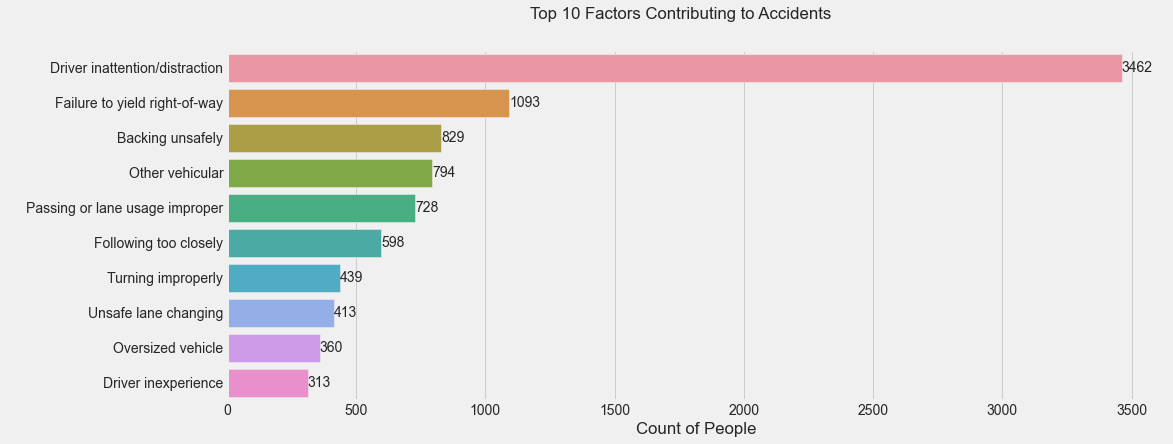

In [558]:
# top reasons of Accidents

fig, ax = plt.subplots(1,1,figsize=(15,6))
plt.suptitle('Top 10 Factors Contributing to Accidents')

# Drop unspecified value

final_df_ = final_df[final_df["contributing_factor_vehicle"] != 'Unspecified']


sns.barplot(y=final_df_.groupby('contributing_factor_vehicle').size().sort_values(ascending=False).head(10).index,
            x=final_df_.groupby('contributing_factor_vehicle').size().sort_values(ascending=False).head(10))

plt.xlabel("Count of People")
plt.ylabel(" ")
ax.bar_label(ax.containers[0])

**INSIGHTS:**
Driver distraction is one of the main reasons of accidents in NYC between 2014 and 2017


[Text(0, 0, '10008'),
 Text(0, 0, '4626'),
 Text(0, 0, '3901'),
 Text(0, 0, '1185'),
 Text(0, 0, '936'),
 Text(0, 0, '901'),
 Text(0, 0, '751'),
 Text(0, 0, '469'),
 Text(0, 0, '386'),
 Text(0, 0, '363')]

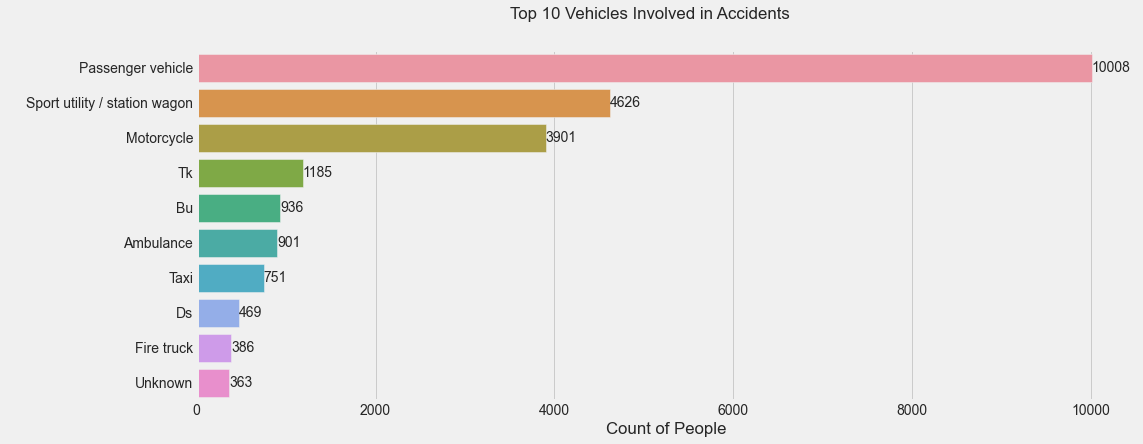

In [561]:
# Distribution as per Vehicles involved in Accidents

fig, ax = plt.subplots(1,1,figsize=(15,6))
plt.suptitle('Top 10 Vehicles Involved in Accidents')


sns.barplot(y=final_df.groupby('vehicle_type_code').size().sort_values(ascending=False).head(10).index,
            x=final_df.groupby('vehicle_type_code').size().sort_values(ascending=False).head(10))

plt.xlabel("Count of People")
plt.ylabel(" ")
ax.bar_label(ax.containers[0])

**INSIGHTS:**
1. Passenger Vehicles are have highest occurence in accidents
2. Data shows Ambulance also being part of accidents, which is surprising


Text(0.5, 0, 'Hour of Accident')

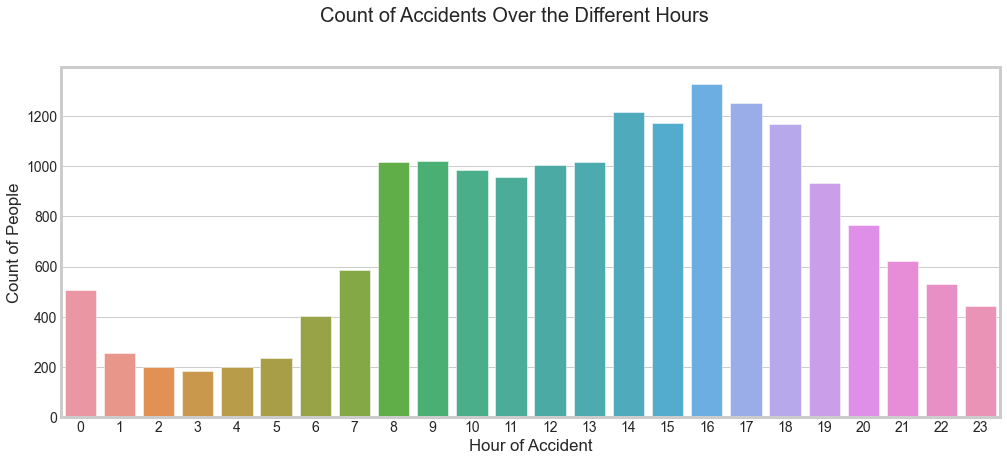

In [563]:
# Hourwise Analysis
sns.set_style('whitegrid')
df['hour'] = df['timestamp'].dt.hour
fig,ax = plt.subplots(1,1,figsize=(15,6))
plt.suptitle('Count of Accidents Over the Different Hours', x=0.5, y=1.02, fontsize=20)

sns.barplot(x=df.groupby('hour').size().index ,y=df.groupby('hour').size())
plt.ylabel("Count of People")
plt.xlabel("Hour of Accident")

**INSIGHTS:**
Hourwise Analysis of NYC data shows normal trend that accidents happen mostly in peak travelling times

## 4. Brooklyn Specific Analysis

In [ ]:
# filtering brooklyn data from complete dataset

brooklyn = df[df.borough == 'Brooklyn']

[Text(0, 0, '495'), Text(0, 0, '581'), Text(0, 0, '663'), Text(0, 0, '1411')]

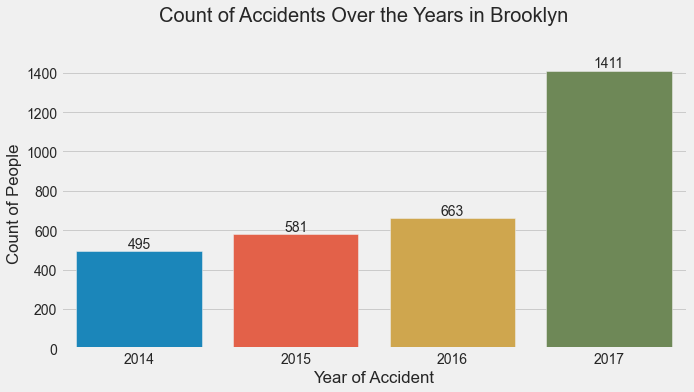

In [592]:
# Accidents Over the Years in Brooklyn

fig,ax = plt.subplots(1,1,figsize=(10,5))
plt.suptitle('Count of Accidents Over the Years in Brooklyn', x=0.5, y=1.02, fontsize=20)

sns.barplot(x=brooklyn.groupby('year').size().index ,y=brooklyn.groupby('year').size())
plt.ylabel("Count of People")
plt.xlabel("Year of Accident")
ax.bar_label(ax.containers[0])

**Insights:**
Analysis for Brooklyn also shows similar trend that accidents have increased exponentially from 2014 till 2017

Text(0, 0.5, ' ')

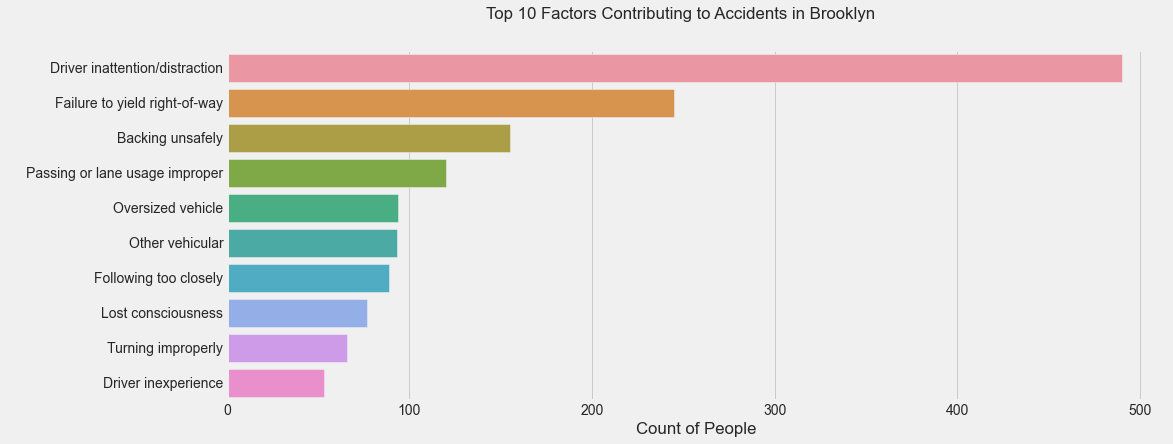

In [593]:
# top 10 reasons of accidents in Brooklyn

brooklyn_ = final_df[final_df.borough == 'Brooklyn']

# Drop unspecified value

brooklyn__ = brooklyn_[brooklyn_["contributing_factor_vehicle"] != 'Unspecified']

fig, ax = plt.subplots(1,1,figsize=(15,6))
plt.suptitle('Top 10 Factors Contributing to Accidents in Brooklyn')

sns.barplot(y=brooklyn__.groupby('contributing_factor_vehicle').size().sort_values(ascending=False).head(10).index,
            x=brooklyn__.groupby('contributing_factor_vehicle').size().sort_values(ascending=False).head(10))

plt.xlabel("Count of People")
plt.ylabel(" ")
#ax.bar_label(ax.containers[0])

**INSIGHTS:**
Similar to Overall Analysis Driver distraction is one of the main reasons of accidents in Brooklyn between 2014 and 2017


Text(0, 0.5, ' ')

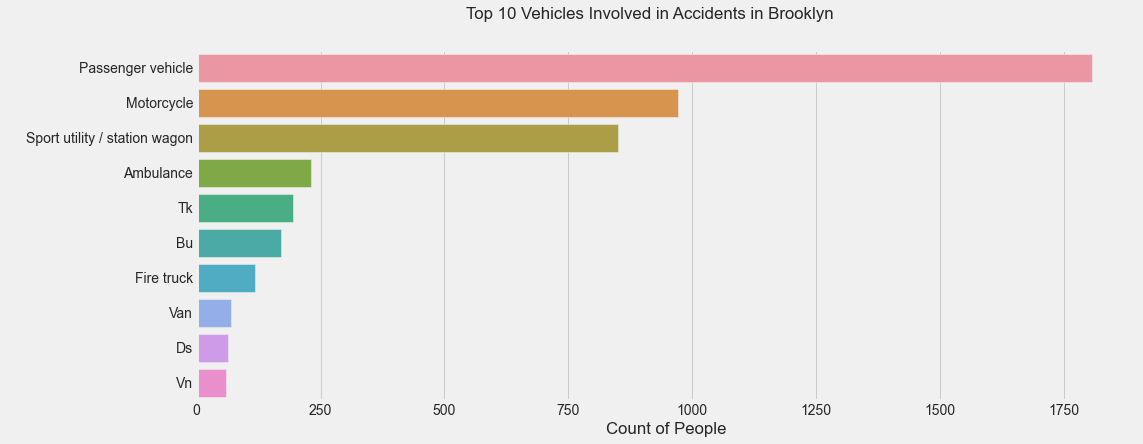

In [594]:
# Count of Top Vehicles involved in Accidents Brooklyn

fig, ax = plt.subplots(1,1,figsize=(15,6))
plt.suptitle('Top 10 Vehicles Involved in Accidents in Brooklyn')


sns.barplot(y=brooklyn_.groupby('vehicle_type_code').size().sort_values(ascending=False).head(10).index,
            x=brooklyn_.groupby('vehicle_type_code').size().sort_values(ascending=False).head(10))

plt.xlabel("Count of People")
plt.ylabel(" ")
#ax.bar_label(ax.containers[0])

**INSIGHTS:**
1. Similar to overall Analysis, Passenger Vehicles are have highest occurence in accidents
2. Here, Ambulance is third highest in accidents compared to overall analysis


<AxesSubplot:xlabel='zip_code'>

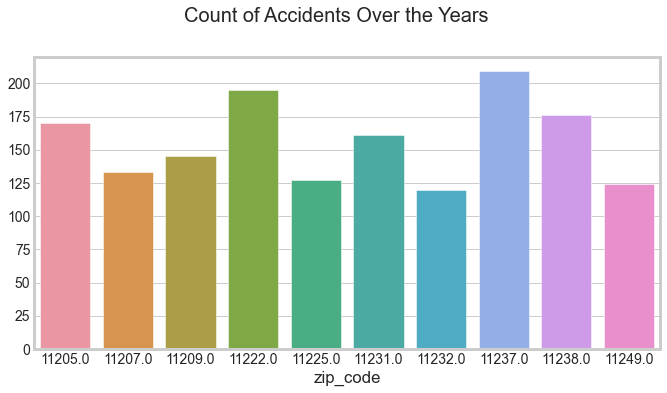

In [464]:
# Top 10 pincodes where most of the accidents have happened in Brooklyn

brooklyn = df[df.borough == 'Brooklyn']

fig,ax = plt.subplots(1,1,figsize=(10,5))
plt.suptitle('Count of Accidents Over the Years', x=0.5, y=1.02, fontsize=20)

sns.barplot(x=brooklyn.groupby('zip_code').size().sort_values(ascending=False).head(10).index,
            y=brooklyn.groupby('zip_code').size().sort_values(ascending=False).head(10))


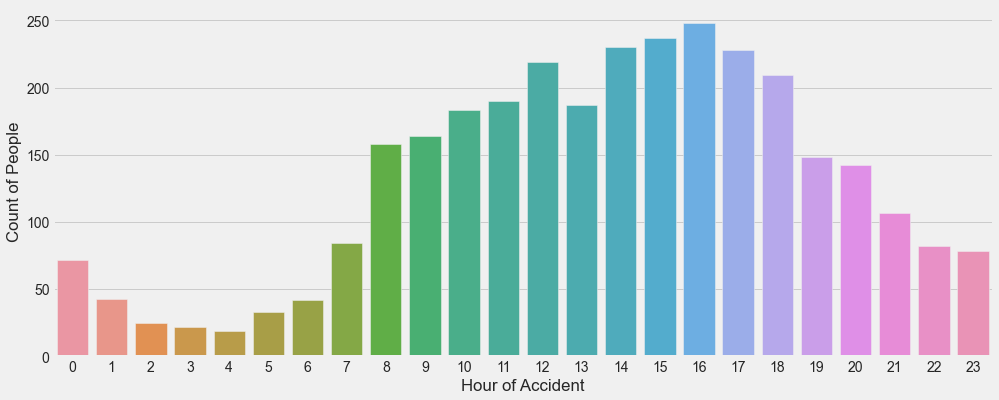

In [596]:
# Hourwise Analysis of Brooklyn

brooklyn['hour'] = brooklyn['timestamp'].dt.hour
fig,ax = plt.subplots(1,1,figsize=(15,6))
#plt.suptitle('Count of Accidents Over the Different Hours', x=0.5, y=1.02, fontsize=20)

sns.barplot(x=brooklyn.groupby('hour').size().index ,y=brooklyn.groupby('hour').size())
plt.ylabel("Count of People")
plt.xlabel("Hour of Accident")
plt.style.use('fivethirtyeight')

**INSIGHTS**
Similar to overall Analysis, Brooklyn also has highest accidents during peak hours